In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
car_dataset = pd.read_csv('./car_data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())
print(car_dataset['Seller_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [9]:
#Label Encoding
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
x = car_dataset.drop(columns=['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price'] 


In [12]:
print(x.head())
y.head()

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


In [15]:
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [17]:
training_predict = lin_reg_model.predict(x_train)


In [18]:
#R squared error
error_score = metrics.r2_score(y_train,training_predict)
print(error_score)

0.8799451660493699


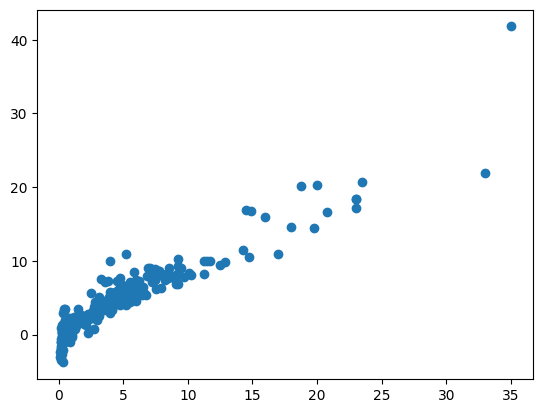

In [19]:
#Visualize actual and predicted prices
plt.scatter(y_train,training_predict)
plt.xlabel = 'Actual Price'
plt.ylabel = 'Predocted Price'
plt.title = 'Actual Price vs Predicted Price'
plt.show()

In [20]:
testing_data_predict = lin_reg_model.predict(x_test)


In [21]:
#R squared error
test_data_predict = metrics.r2_score(y_test,testing_data_predict)
print(test_data_predict)

0.8365766715026473


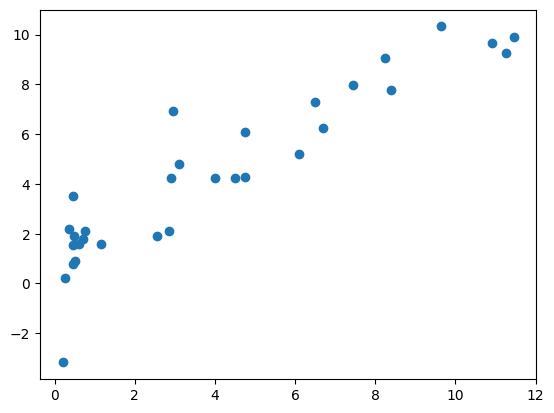

In [22]:
plt.scatter(y_test,testing_data_predict)
plt.xlabel = 'Actual Price'
plt.ylabel = 'Predicted Price'
plt.title = 'Actual Price vs Predicted Price'
plt.show()

In [23]:
#Lasso Regression
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [25]:
lasso_training_predict = lass_reg_model.predict(x_train)

In [26]:
#R squared model
error_score = metrics.r2_score(lasso_training_predict,y_train)
print(error_score)

0.7984590240704255


In [27]:
lasso_testing_predict = lass_reg_model.predict(x_test)

In [28]:
#R squared error
error_score = metrics.r2_score(lasso_testing_predict,y_test)
print(error_score)

0.7711110403265509


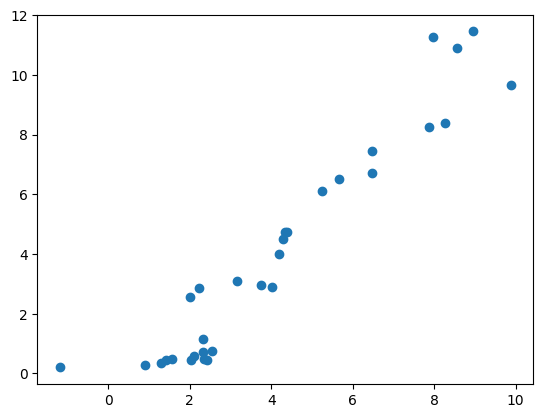

In [29]:
plt.scatter(lasso_testing_predict,y_test)
plt.xlabel = 'Actual Price'
plt.ylabel = 'Predicted Price'
plt.title = 'Actual Price vs Predicted Price'
plt.show()